In [26]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import f1_score

In [20]:
modelFolder = 'all_pos'
need_fit = False

In [4]:
#Считает чувствительность и специфичность
def calcParams(testing, predict):
    zdorovieTesting = 0
    bolnieTesting = 0
    for item in testing:    
        if item == 0:
            zdorovieTesting += 1
        else:
            bolnieTesting += 1
    #print(zdorovieTesting, bolnieTesting);
    zdoroviePredict = 0
    bolniePredict = 0
    for item in predict:    
        if item == 0:
            zdoroviePredict += 1
        else:
            bolniePredict += 1
    #print(zdoroviePredict, bolniePredict);

    chuvstv = bolniePredict / bolnieTesting
    specifich = zdoroviePredict / zdorovieTesting
    return chuvstv,specifich

#Строит круговую диаграмму с точностью определения
def makeAccuracyGraph(accuracy):
    labels = 'Совпадает', 'Не совпадает'
    values = [accuracy, 1 - accuracy]
    explode = (0.1, 0)

    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()
    
#Обучает и возвращает классифицированные данные
def fitPredict(clf, xTrain, yTrain, xTest):
    return clf.fit(xTrain, yTrain).predict(xTest)

In [17]:
data = pd.read_csv(modelFolder + '/data.csv', 
                   delimiter=',', 
                   names=['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик', 'target', 'position'])

xTrain, xTest, yTrain, yTest = train_test_split(
    data[['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик']],
    data.target, 
    test_size = 0.25, 
    random_state = 0
)

# Метод SVM

Чувствительность: 1.2222222222222223 
Специфичность: 0.3333333333333333
F1:  0.8200000000000001


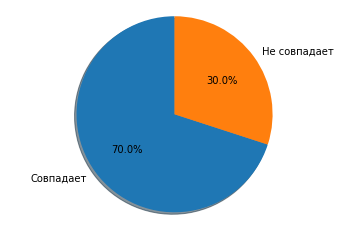

In [27]:
#SVM
if need_fit:
    clf = svm.SVC(gamma='scale').fit(xTrain, yTrain)    
    with open('svm_model.pickle', 'wb') as f:
        pickle.dump(clf, f)
else:
    with open('svm_model.pickle', 'rb') as f:
        clf = pickle.load(f)

yPred = clf.predict(xTest)
#определяем точность
accuracy = accuracy_score(yTest, yPred)

chuvstv, specifich = calcParams(yTest, yPred)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich);

print('F1: ', f1_score(yTest, yPred, average='binary'))

makeAccuracyGraph(accuracy)

# Метод KNN (Ближайших соседей)

Чувствительность: 0.8222222222222222 
Специфичность: 1.5333333333333334
F1:  0.7073170731707318


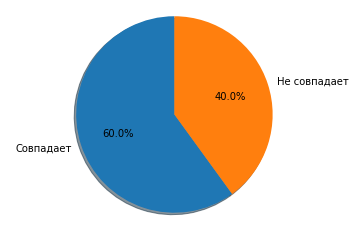

In [28]:
#KNN
clf = neighbors.KNeighborsClassifier(5, weights='uniform')
yPred = fitPredict(clf, xTrain, yTrain, xTest)
#определяем точность
accuracy = accuracy_score(yTest, yPred)

chuvstv, specifich = calcParams(yTest, yPred)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich);

print('F1: ', f1_score(yTest, yPred, average='binary'))

makeAccuracyGraph(accuracy)

# Наивный баейсовский классификатор

Чувствительность: 0.8222222222222222 
Специфичность: 1.5333333333333334
F1:  0.7073170731707318


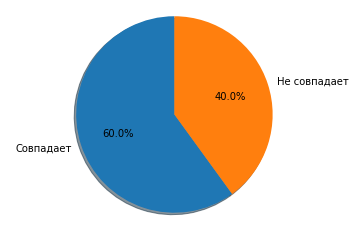

In [29]:
#NB
gnb = GaussianNB()
yPred = fitPredict(clf, xTrain, yTrain, xTest)
#определяем точность
accuracy = accuracy_score(yTest, yPred)

chuvstv, specifich = calcParams(yTest, yPred)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich)

print('F1: ', f1_score(yTest, yPred, average='binary'))

makeAccuracyGraph(accuracy)

# Bagging meta-estimator + SVM

Чувствительность: 1.3333333333333333 
Специфичность: 0.0
F1:  0.8571428571428571


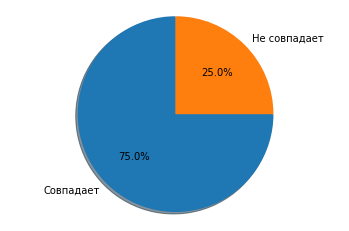

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(svm.SVC(gamma='scale'),
                            max_samples=0.5, max_features=0.5)
yPred = fitPredict(bagging, xTrain, yTrain, xTest)
#определяем точность
accuracy = accuracy_score(yTest, yPred)

chuvstv, specifich = calcParams(yTest, yPred)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich)

print('F1: ', f1_score(yTest, yPred, average='binary'))

makeAccuracyGraph(accuracy)

# Stochastic Gradient Descent (SGD)

Чувствительность: 1.3333333333333333 
Специфичность: 0.0
F1:  0.8571428571428571


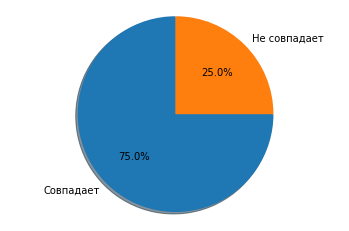

In [31]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
yPred = fitPredict(bagging, xTrain, yTrain, xTest)
#определяем точность
accuracy = accuracy_score(yTest, yPred)

chuvstv, specifich = calcParams(yTest, yPred)
print('Чувствительность:', chuvstv, '\nСпецифичность:', specifich)

print('F1: ', f1_score(yTest, yPred, average='binary'))

makeAccuracyGraph(accuracy)